#**Custom Training with YOLOv5**

In this tutorial, I assemble a dataset and train a custom YOLOv5 model to recognize the objects in my dataset. To do so we will take the following steps:

Gather a dataset of images and label our dataset
*Export our dataset to YOLOv5
*Train YOLOv5 to recognize the objects in our dataset
*Evaluate our YOLOv5 model's performance
*Run test inference to view our model at work

In [1]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.09 MiB | 7.85 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━

#**Step 2: Assemble Our Dataset**

In order to train my custom model, I have to assemble a dataset of representative images with bounding box annotations around the objects that I want to detect. And I need my dataset to be in YOLOv5 format.

In Roboflow, I can choose between two paths:

*Convert an existing dataset to YOLOv5 format. Roboflow supports over 30 formats object detection formats for conversion.
*Upload raw images and annotate them in Roboflow with Roboflow Annotate.



#**Annotate**

#**Version**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QDPg7NV4izw7nYLLSfVo")
project = rf.workspace("university-vmdku").project("pds_12_task_2")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PDS_12_task_2-4 in yolov5pytorch:: 100%|██████████| 246/246 [00:00<00:00, 5174.28it/s]


#**Step 3: Train my Custom YOLOv5 model**

Here, we are able to pass a number of arguments:

img: define input image size
batch: determine batch size
epochs: define the number of training epochs. (Note: often, 3000+ are common here!)
data: Our dataset locaiton is saved in the dataset.location
weights: specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
cache: cache images for faster training

In [3]:
!python train.py --img 416 --batch 16 --epochs 15 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-30 12:53:07.855457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738241588.149396    1458 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738241588.228334    1458 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

#**Evaluate Custom YOLOv5 Detector Performance**

Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is mAP_0.5 - learn more about mean average precision here.

In [4]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

#**Training losses and performance metrics are saved to Tensorboard and also to a logfile.**

If you are new to these metrics, the one you want to focus on is mAP_0.5 - learn more about mean average precision here.

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/PDS_12_task_2-4/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/yolov5/PDS_12_task_2-4/test/images/18_jpg.rf.0e8fff981e1467c2cfd176448907ba11.jpg: 416x416 1 Two-pin-and-three-pin-plug, 208.9ms
image 2/5 /content/yolov5/PDS_12_task_2-4/test/images/22_jpg.rf.3bb3824e83638657efac106a983ecdf6.jpg: 416x416 6 Two-pin-and-three-pin-plugs, 209.3ms
image 3/5 /content

#**Conclusion and Next Steps**

 I trained a custom YOLOv5 model to recognize my custom objects.

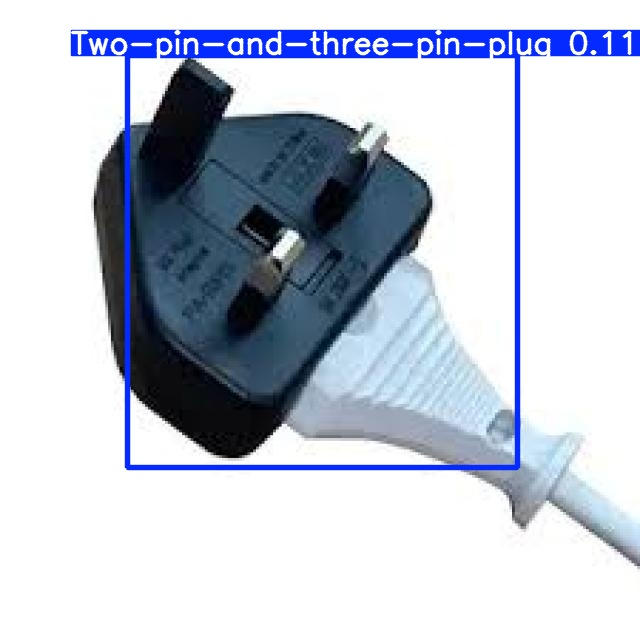

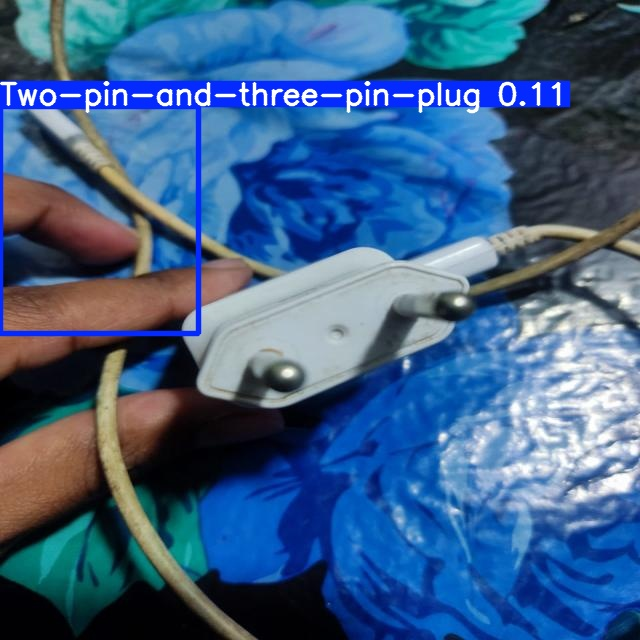

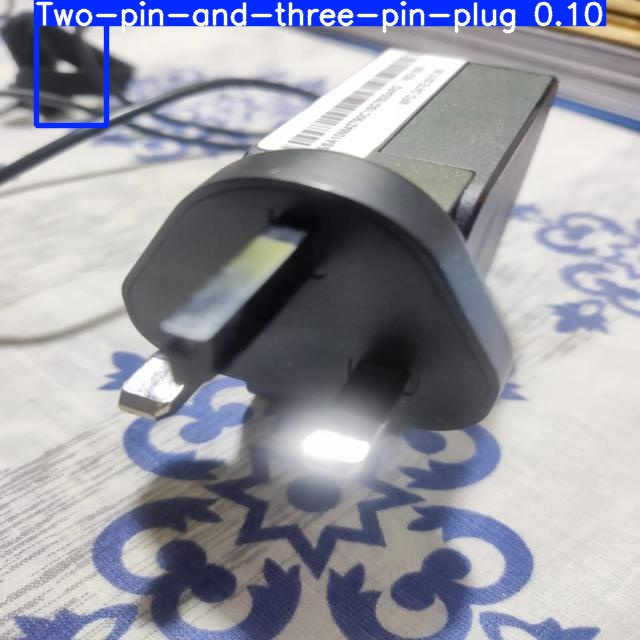

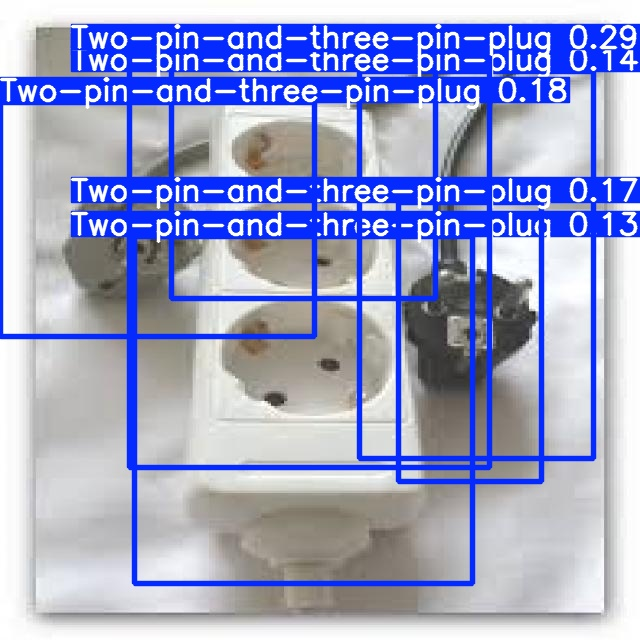

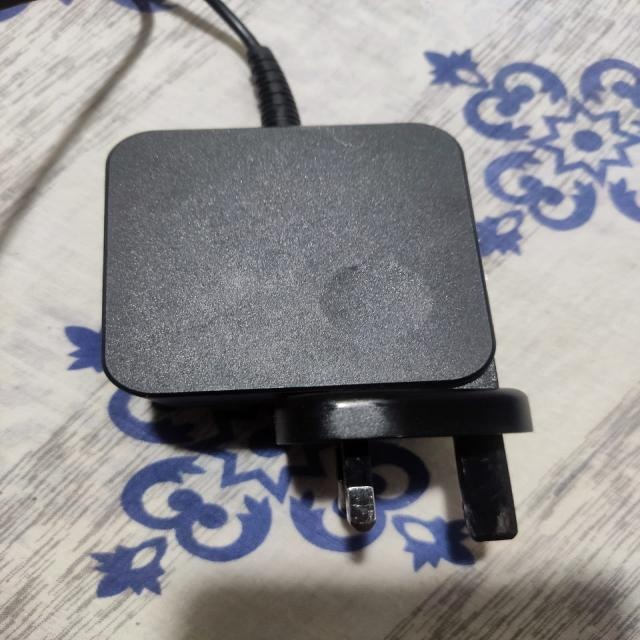

In [6]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [7]:
# #export your model's weights for future use
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')